<a href="https://colab.research.google.com/github/AlexeyTri/MLScratch/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Principal Component Analisys

Eigenvector, Eigenvalues - the eigenvectors point in the direction of the maximum varience, and the corresponding eigenvalues indicates the importance of its corresponding eigen vector

$Av^{→} = λv^{→}$


Approach:

1. substract the mean from X
2. calculate Cov(X,X)
3. calculate eigenvectors and eigenvalues covmatrix
4. sort the eigenvectors according to their eigenvalues in decreasing order
5. choose first k eigenvectors and that will be the new k dimenstions
6. transform the ordinal, n dimansional data points into k dimensions (=Projections with dot product)




In [1]:
import numpy as np
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [53]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.cov = None
        self.eigenvectors = None
        self.eigenvalues = None

    def fit(self, X):
        self.mean = np.mean(X)
        X = X - self.mean
        # cov = SAMPLE x SAMPLE
        self.cov = np.cov(X.T)
        self.eigenvalues, self.eigenvectors = np.linalg.eig(self.cov)
        self.eigenvectors = self.eigenvectors.T
        idx = np.argsort(self.eigenvalues)[::-1]
        self.eigenvalues = self.eigenvalues[idx]
        self.eigenvectors = self.eigenvectors[idx]

        self.components = self.eigenvectors[:self.n_components]

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [44]:
data = datasets.load_iris()
X = data.data
y = data.target

In [54]:
pca = PCA(2)
pca.fit(X)
X_project = pca.transform(X)
pca.components

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [-0.65658877, -0.73016143,  0.17337266,  0.07548102]])

In [55]:
X.shape, X_project.shape

((150, 4), (150, 2))

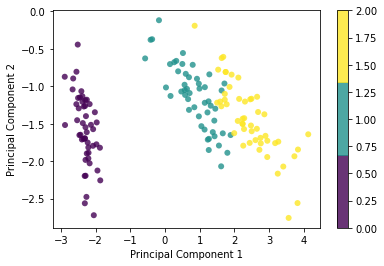

In [56]:
x1 = X_project[:, 0]
x2 = X_project[:, 1]

plt.scatter(
        x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()